# MIT102 ADBMS PROJECT PREDICTING MODELS

**Submitted by: Rhogiel V. Andoy**


**Submitted to: Jocelyn B. Barbosa, PhD**

## 1. Checking and cleaning of the dataset

In [58]:
import pandas as pd
import numpy as np

*Loading the Raisin Dataset*

In [59]:
df = pd.read_csv('Raisin_Dataset.csv')

In [60]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


*Checking the number of instances per class if it is balanced. Balancing a dataset makes training a model easier because it helps prevent the model from becoming biassed towards one class. In other words, the model will no longer favour the majority class just because it contains more data.*

In [61]:
df.groupby('Class').size()

Class
Besni      450
Kecimen    450
dtype: int64

*Transforming the class from string to numerical values*

In [62]:
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})

In [63]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [64]:
df.shape

(900, 8)

In [65]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [67]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

### Separating feature and target variables and create new DataFrames each

*Dividing the dataset into feature and target variables and assign into each of their own DataFrame*

In [68]:
x = df[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','Extent','Perimeter']]
y = df['Class']

*Delaring a list that will hold the classifier scores. To be used later on in the visualization or graphical representation secion*

In [69]:
clf_scores = []

### Self defined functions

*A function that will convert the raw mean of a classifier score into percentages*

In [70]:
def percentage(ave):
    per = ave * 100
    return round(per, 2)

*A function that will perform 10-fold cross validation*

In [71]:
from sklearn.model_selection import cross_val_score
def get_scores(classifier, scoring_method):
    ave = cross_val_score(classifier, x, y, cv=10, scoring=scoring_method).mean()
    return percentage(ave)

*A function that will perform cross_validate to store the accuracy scores of each individual n of each fold. To be used in the visualization section*

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

def get_scoreslist_accuracy(classifier, is_regression=False):
    scoring = ['accuracy']
    
    if is_regression:
        scaler = StandardScaler()

        pipeline = Pipeline([('transformer', scaler), ('estimator', classifier)])
        scores = cross_validate(pipeline, x, y, cv=10, scoring=scoring, return_train_score=True)
    else:
        scores = cross_validate(classifier, x, y, cv=10, scoring=scoring, return_train_score=True)
        
    return {'Training Accuracy Scores': scores['train_accuracy'], 'Validation Accuracy Scores': scores['test_accuracy']}

*A function that will plot the results of the get_scoreslist_accuracy function*

In [73]:
def plot_accuracy_result(x_label,y_label, train_data, validation_data):
    plt.figure(figsize=(10,8))
    labels = [
        "1st Fold", 
        "2nd Fold", 
        "3rd Fold", 
        "4th Fold", 
        "5th Fold", 
        "6th Fold", 
        "7th Fold", 
        "8th Fold", 
        "9th Fold", 
        "10th Fold"
    ]
    
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, validation_data, 0.4, color='red', label='Validation')
    # plt.set_title("Accuracy scores in 10 folds")
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    
    for i in ax.containers:
        ax.bar_label(i,fontsize=5)
    
    plt.show()

# 2. Perform five (5) Classifiers

### Decision Tree

**Perform DT Classifier and apply 10-fold cross validation**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, make_scorer

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
accuracy = get_scores(dtree, 'accuracy')
recall = get_scores(dtree, 'recall')
precision = get_scores(dtree, 'precision')
f1 = get_scores(dtree, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(dtree, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(dtree, sensitivity)

In [77]:
clf_scores.append(['DT', 'Accuracy', accuracy])
clf_scores.append(['DT', 'Recall', recall])
clf_scores.append(['DT', 'Precision', precision])
clf_scores.append(['DT', 'F1-Score', f1])
clf_scores.append(['DT', 'Specificity', specificity_score])
clf_scores.append(['DT', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 80.89], ['DT', 'Recall', 80.89], ['DT', 'Precision', 81.18], ['DT', 'F1-Score', 80.81], ['DT', 'Specificity', 80.89], ['DT', 'Sensitivity', 80.44]]


### Random Forest

**Perform RF Classifier and apply 10-fold cross validation**

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)

In [79]:
accuracy = get_scores(rf, 'accuracy')
recall = get_scores(rf, 'recall')
precision = get_scores(rf, 'precision')
f1 = get_scores(rf, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(rf, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(rf, sensitivity)

In [80]:
clf_scores.append(['RF', 'Accuracy', accuracy])
clf_scores.append(['RF', 'Recall', recall])
clf_scores.append(['RF', 'Precision', precision])
clf_scores.append(['RF', 'F1-Score', f1])
clf_scores.append(['RF', 'Specificity', specificity_score])
clf_scores.append(['RF', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 80.89], ['DT', 'Recall', 80.89], ['DT', 'Precision', 81.18], ['DT', 'F1-Score', 80.81], ['DT', 'Specificity', 80.89], ['DT', 'Sensitivity', 80.44], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44]]


### K-nearest Neighbor (kNN)

**Perform KNN Classifier and apply 10-fold cross validation**

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

In [82]:
accuracy = get_scores(knn, 'accuracy')
recall = get_scores(knn, 'recall')
precision = get_scores(knn, 'precision')
f1 = get_scores(knn, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(knn, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(knn, sensitivity)

In [83]:
clf_scores.append(['KNN', 'Accuracy', accuracy])
clf_scores.append(['KNN', 'Recall', recall])
clf_scores.append(['KNN', 'Precision', precision])
clf_scores.append(['KNN', 'F1-Score', f1])
clf_scores.append(['KNN', 'Specificity', specificity_score])
clf_scores.append(['KNN', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 80.89], ['DT', 'Recall', 80.89], ['DT', 'Precision', 81.18], ['DT', 'F1-Score', 80.81], ['DT', 'Specificity', 80.89], ['DT', 'Sensitivity', 80.44], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44], ['KNN', 'Accuracy', 83.44], ['KNN', 'Recall', 76.0], ['KNN', 'Precision', 89.47], ['KNN', 'F1-Score', 82.07], ['KNN', 'Specificity', 90.89], ['KNN', 'Sensitivity', 76.0]]


### Regularized Logistic Regression

**Perform Regularized LR Classifier and apply 10-fold cross validation with the help of sklearn StandardScaler function to standardize the data values into a standard format**

In [84]:
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lr2 = LogisticRegression(C=0.01)

In [85]:
scaler = StandardScaler()

pipeline = Pipeline([('transformer', scaler), ('estimator', lr2)])

In [86]:
accuracy = get_scores(pipeline, 'accuracy')
recall = get_scores(pipeline, 'recall')
precision = get_scores(pipeline, 'precision')
f1 = get_scores(pipeline, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(pipeline, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(pipeline, sensitivity)

In [87]:
clf_scores.append(['LR', 'Accuracy', accuracy])
clf_scores.append(['LR', 'Recall', recall])
clf_scores.append(['LR', 'Precision', precision])
clf_scores.append(['LR', 'F1-Score', f1])
clf_scores.append(['LR', 'Specificity', specificity_score])
clf_scores.append(['LR', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 80.89], ['DT', 'Recall', 80.89], ['DT', 'Precision', 81.18], ['DT', 'F1-Score', 80.81], ['DT', 'Specificity', 80.89], ['DT', 'Sensitivity', 80.44], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44], ['KNN', 'Accuracy', 83.44], ['KNN', 'Recall', 76.0], ['KNN', 'Precision', 89.47], ['KNN', 'F1-Score', 82.07], ['KNN', 'Specificity', 90.89], ['KNN', 'Sensitivity', 76.0], ['LR', 'Accuracy', 86.56], ['LR', 'Recall', 83.33], ['LR', 'Precision', 89.14], ['LR', 'F1-Score', 86.02], ['LR', 'Specificity', 89.78], ['LR', 'Sensitivity', 83.33]]


### Support Vector Machine

**Perform SVM Classifier and apply 10-fold cross validation**

In [88]:
from sklearn import svm

sv_clf = svm.SVC(kernel='linear', C=1, random_state=1)

In [89]:
accuracy = get_scores(sv_clf, 'accuracy')
recall = get_scores(sv_clf, 'recall')
precision = get_scores(sv_clf, 'precision')
f1 = get_scores(sv_clf, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(sv_clf, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(sv_clf, sensitivity)

In [90]:
clf_scores.append(['SVM', 'Accuracy', accuracy])
clf_scores.append(['SVM', 'Recall', recall])
clf_scores.append(['SVM', 'Precision', precision])
clf_scores.append(['SVM', 'F1-Score', f1])
clf_scores.append(['SVM', 'Specificity', specificity_score])
clf_scores.append(['SVM', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 80.89], ['DT', 'Recall', 80.89], ['DT', 'Precision', 81.18], ['DT', 'F1-Score', 80.81], ['DT', 'Specificity', 80.89], ['DT', 'Sensitivity', 80.44], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44], ['KNN', 'Accuracy', 83.44], ['KNN', 'Recall', 76.0], ['KNN', 'Precision', 89.47], ['KNN', 'F1-Score', 82.07], ['KNN', 'Specificity', 90.89], ['KNN', 'Sensitivity', 76.0], ['LR', 'Accuracy', 86.56], ['LR', 'Recall', 83.33], ['LR', 'Precision', 89.14], ['LR', 'F1-Score', 86.02], ['LR', 'Specificity', 89.78], ['LR', 'Sensitivity', 83.33], ['SVM', 'Accuracy', 85.67], ['SVM', 'Recall', 86.22], ['SVM', 'Precision', 85.42], ['SVM', 'F1-Score', 85.63], ['SVM', 'Specificity', 85.11], ['SVM', 'Sensitivity', 86.22]]


### Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
pipeline_nb = Pipeline([('transformer', scaler), ('estimator', nb)])

In [92]:
accuracy = get_scores(pipeline_nb, 'accuracy')
recall = get_scores(pipeline_nb, 'recall')
precision = get_scores(pipeline_nb, 'precision')
f1 = get_scores(pipeline_nb, 'f1')

specificity = make_scorer(recall_score, pos_label=0)
specificity_score = get_scores(pipeline_nb, specificity)

sensitivity = make_scorer(recall_score, pos_label=1)
sensitivity_score = get_scores(pipeline_nb, sensitivity)

In [93]:
clf_scores.append(['NB', 'Accuracy', accuracy])
clf_scores.append(['NB', 'Recall', recall])
clf_scores.append(['NB', 'Precision', precision])
clf_scores.append(['NB', 'F1-Score', f1])
clf_scores.append(['NB', 'Specificity', specificity_score])
clf_scores.append(['NB', 'Sensitivity', sensitivity_score])
print(clf_scores)

[['DT', 'Accuracy', 80.89], ['DT', 'Recall', 80.89], ['DT', 'Precision', 81.18], ['DT', 'F1-Score', 80.81], ['DT', 'Specificity', 80.89], ['DT', 'Sensitivity', 80.44], ['RF', 'Accuracy', 86.67], ['RF', 'Recall', 84.44], ['RF', 'Precision', 88.53], ['RF', 'F1-Score', 86.25], ['RF', 'Specificity', 88.89], ['RF', 'Sensitivity', 84.44], ['KNN', 'Accuracy', 83.44], ['KNN', 'Recall', 76.0], ['KNN', 'Precision', 89.47], ['KNN', 'F1-Score', 82.07], ['KNN', 'Specificity', 90.89], ['KNN', 'Sensitivity', 76.0], ['LR', 'Accuracy', 86.56], ['LR', 'Recall', 83.33], ['LR', 'Precision', 89.14], ['LR', 'F1-Score', 86.02], ['LR', 'Specificity', 89.78], ['LR', 'Sensitivity', 83.33], ['SVM', 'Accuracy', 85.67], ['SVM', 'Recall', 86.22], ['SVM', 'Precision', 85.42], ['SVM', 'F1-Score', 85.63], ['SVM', 'Specificity', 85.11], ['SVM', 'Sensitivity', 86.22], ['NB', 'Accuracy', 83.89], ['NB', 'Recall', 74.67], ['NB', 'Precision', 91.62], ['NB', 'F1-Score', 82.11], ['NB', 'Specificity', 93.11], ['NB', 'Sensitivi

# 3. Visualization

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

## 10-fold cross validation accuracy scores in each classifiers

#### DT Accuracy Scores in 10 folds

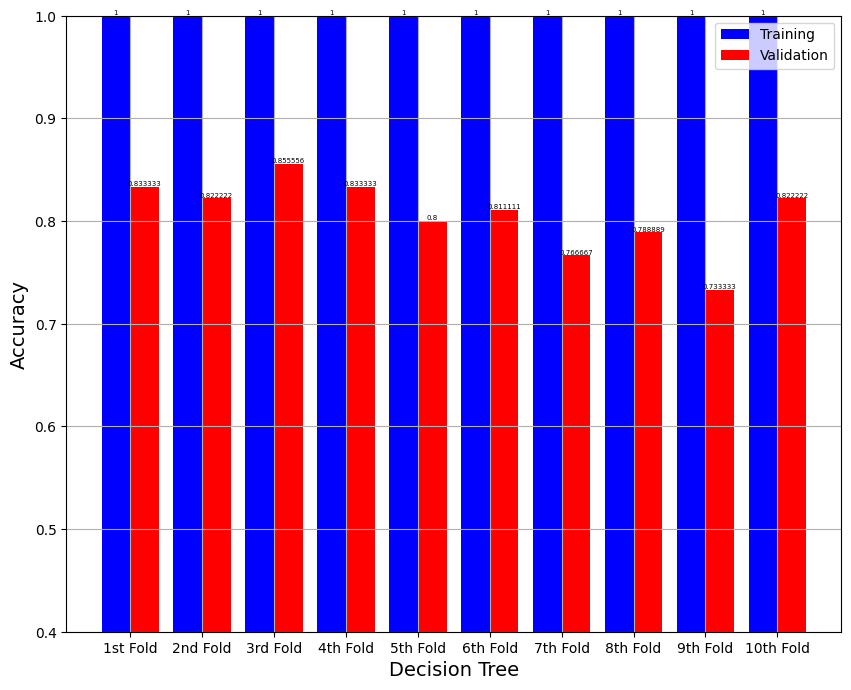

In [95]:
dt_scores = get_scoreslist_accuracy(dtree)

plot_accuracy_result(
    'Decision Tree', 
    'Accuracy', 
    dt_scores['Training Accuracy Scores'],
    dt_scores['Validation Accuracy Scores'],
)

#### RF Accuracy Scores in 10 folds

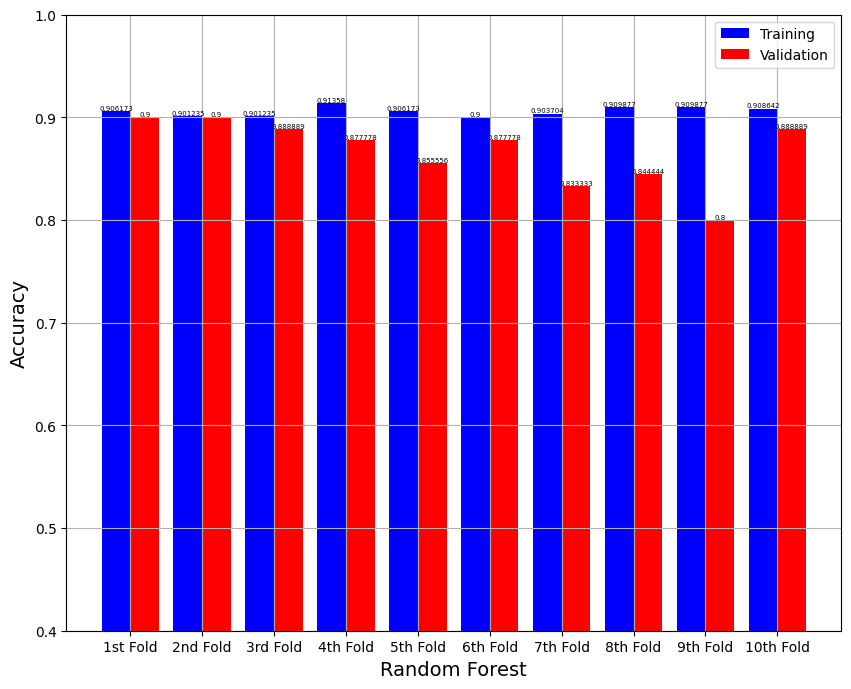

In [96]:
rf_scores = get_scoreslist_accuracy(rf)

plot_accuracy_result(
    'Random Forest', 
    'Accuracy', 
    rf_scores['Training Accuracy Scores'],
    rf_scores['Validation Accuracy Scores'],
)

#### KNN Accuracy Scores in 10 folds

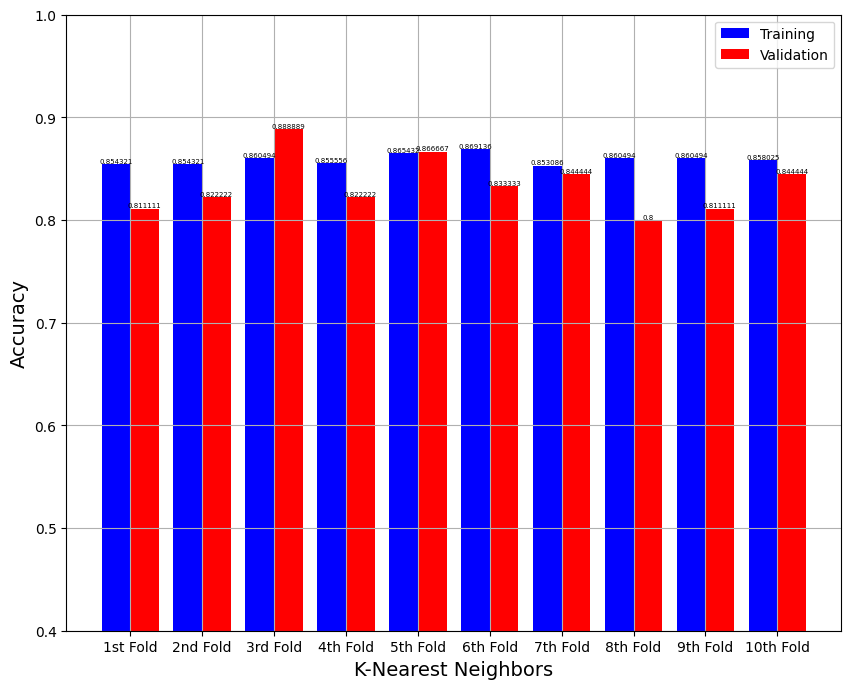

In [97]:
knn_scores = get_scoreslist_accuracy(knn)

plot_accuracy_result(
    'K-Nearest Neighbors', 
    'Accuracy', 
    knn_scores['Training Accuracy Scores'],
    knn_scores['Validation Accuracy Scores'],
)

#### Logistic Regression (Regularized) Scores in 10 folds

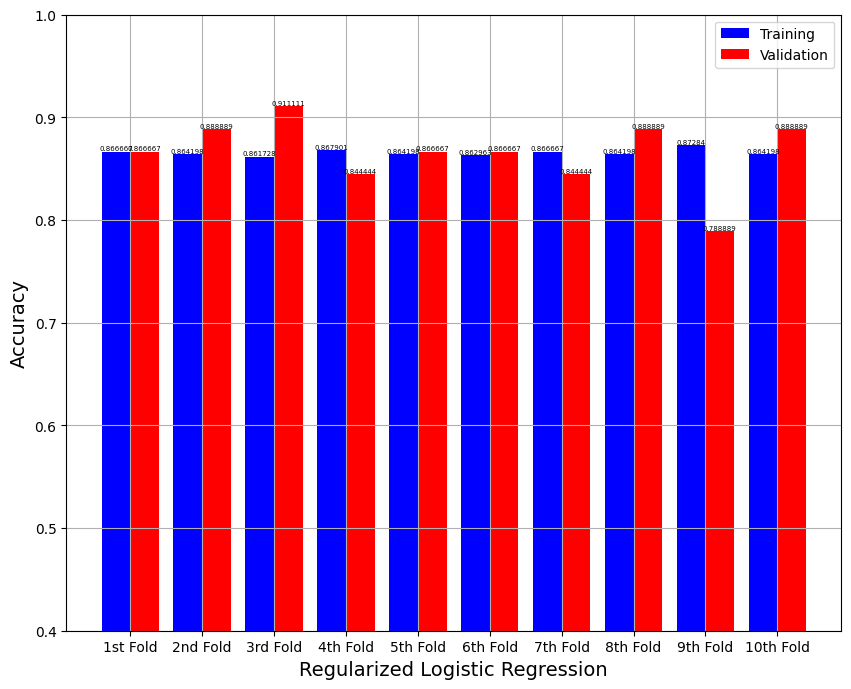

In [98]:
lr2_scores = get_scoreslist_accuracy(lr2, True)

plot_accuracy_result(
    'Regularized Logistic Regression', 
    'Accuracy', 
    lr2_scores['Training Accuracy Scores'],
    lr2_scores['Validation Accuracy Scores'],
)

#### SVM Accuracy Scores in 10 folds

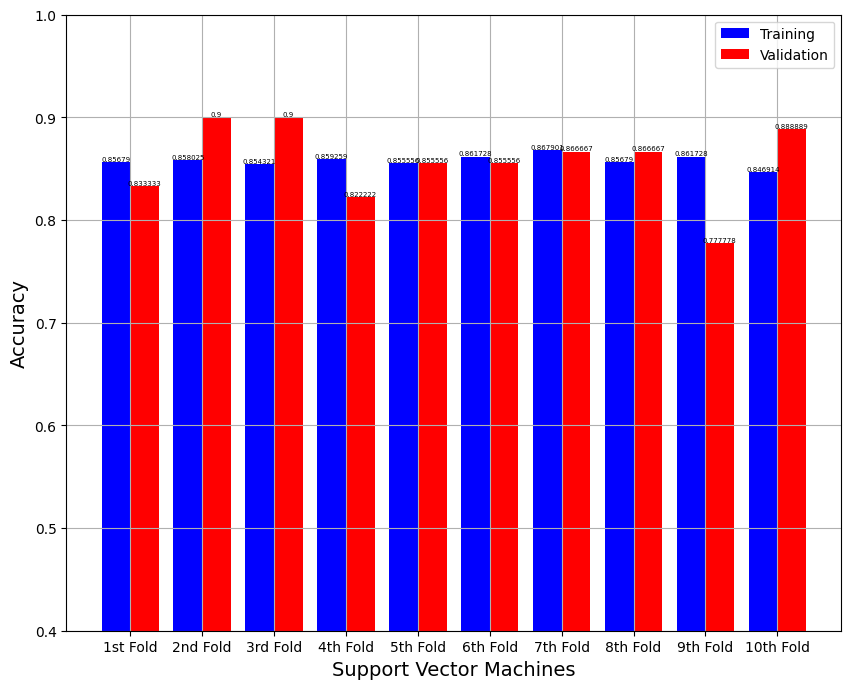

In [99]:
svm_scores = get_scoreslist_accuracy(sv_clf)

plot_accuracy_result(
    'Support Vector Machines', 
    'Accuracy', 
    svm_scores['Training Accuracy Scores'],
    svm_scores['Validation Accuracy Scores'],
)

#### Naive Bayes Scores in 10 fold

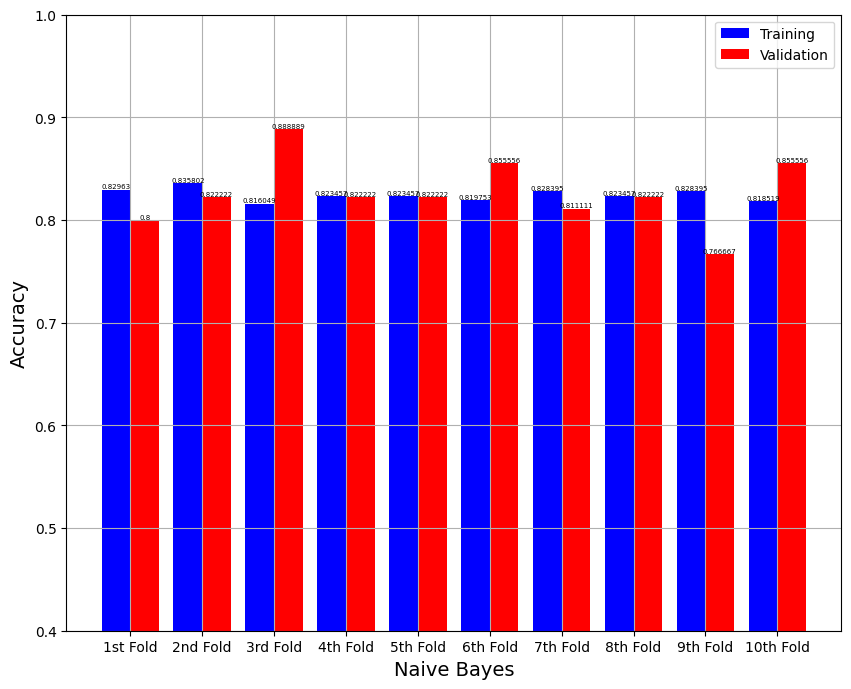

In [100]:
nb_scores = get_scoreslist_accuracy(nb)

plot_accuracy_result(
    'Naive Bayes', 
    'Accuracy', 
    nb_scores['Training Accuracy Scores'],
    nb_scores['Validation Accuracy Scores'],
)

### PERFORMANCE MEASURES

In [101]:
viz_df = pd.DataFrame(clf_scores, columns=['Classifier','Performance Measure','Score'])

viz_df

,Classifier,Performance Measure,Score
0,DT,Accuracy,80.89
1,DT,Recall,80.89
2,DT,Precision,81.18
3,DT,F1-Score,80.81
4,DT,Specificity,80.89
5,DT,Sensitivity,80.44
6,RF,Accuracy,86.67
7,RF,Recall,84.44
8,RF,Precision,88.53
9,RF,F1-Score,86.25


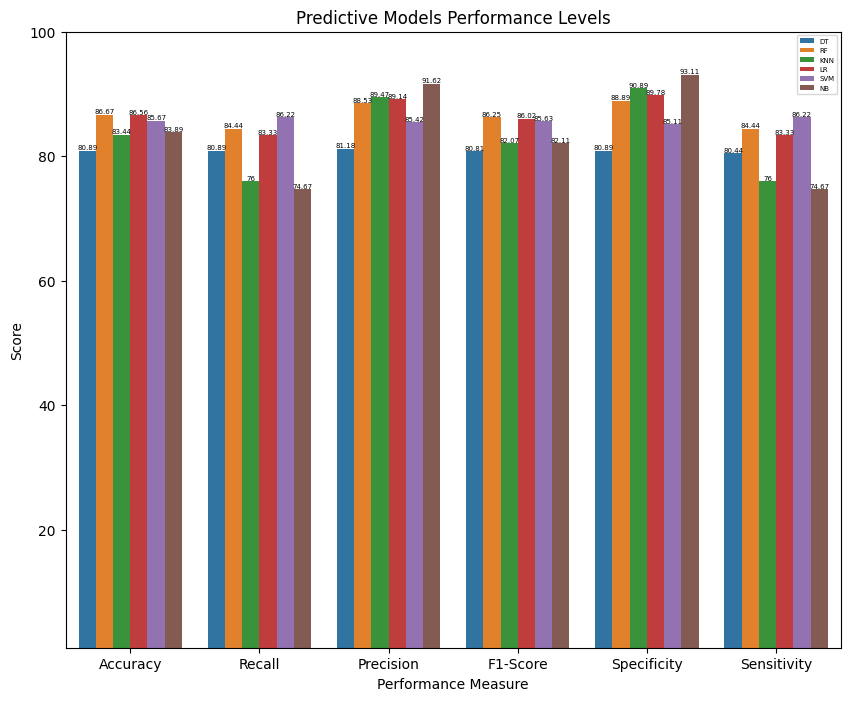

In [110]:
fig, ax = plt.subplots(figsize=(10, 8))

perf_levels = sns.barplot(
    x ='Performance Measure', 
    y='Score', 
    hue='Classifier',
    data=viz_df, 
    estimator=np.median, 
    errorbar=('ci', 0), 
    ax=ax
)

ax.set_ylim(1, 100)
perf_levels.legend(fontsize=5)
perf_levels.set(title='Predictive Models Performance Levels')

for i in ax.containers:
    ax.bar_label(i,fontsize=5)

plt.show()

# Extra (Performed Stratified K-Fold Cross Validation with Decision Tree)

**The 10-fold visualization of Decision Tree above performed poorly based on accuracy. I tried out the stratified K-Fold cross validation to balance the distribution of the classes in each fold to avoid bias towards each n fold.**

In [111]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified_train = []
lst_accu_stratified_test = []

df_strat = pd.read_csv('Raisin_Dataset.csv', header=None)

In [112]:
df_strat = df_strat.drop(df_strat.index[0])
df_strat

,0,1,2,3,4,5,6,7
1,87524,442.2460114,253.291155,0.819738392,90546,0.758650579,1184.04,Kecimen
2,75166,406.690687,243.0324363,0.801805234,78789,0.68412957,1121.786,Kecimen
3,90856,442.2670483,266.3283177,0.798353619,93717,0.637612812,1208.575,Kecimen
4,45928,286.5405586,208.7600423,0.684989217,47336,0.699599385,844.162,Kecimen
5,79408,352.1907699,290.8275329,0.56401133,81463,0.792771926,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
896,83248,430.0773077,247.8386945,0.817262582,85839,0.66879293,1129.072,Besni
897,87350,440.7356978,259.2931487,0.808628995,90899,0.636476246,1214.252,Besni
898,99657,431.7069809,298.8373229,0.721684066,106264,0.741098519,1292.828,Besni
899,93523,476.3440939,254.1760536,0.84573851,97653,0.658798253,1258.548,Besni


In [113]:
df_strat[7] = df_strat[7].map({'Kecimen': 0, 'Besni': 1})

x_strat = df_strat[[0,1,2,3,4,5,6]]
y_strat = df_strat[7]

In [114]:
x_strat

,0,1,2,3,4,5,6
1,87524,442.2460114,253.291155,0.819738392,90546,0.758650579,1184.04
2,75166,406.690687,243.0324363,0.801805234,78789,0.68412957,1121.786
3,90856,442.2670483,266.3283177,0.798353619,93717,0.637612812,1208.575
4,45928,286.5405586,208.7600423,0.684989217,47336,0.699599385,844.162
5,79408,352.1907699,290.8275329,0.56401133,81463,0.792771926,1073.251
...,...,...,...,...,...,...,...
896,83248,430.0773077,247.8386945,0.817262582,85839,0.66879293,1129.072
897,87350,440.7356978,259.2931487,0.808628995,90899,0.636476246,1214.252
898,99657,431.7069809,298.8373229,0.721684066,106264,0.741098519,1292.828
899,93523,476.3440939,254.1760536,0.84573851,97653,0.658798253,1258.548


In [115]:
y_strat

1      0
2      0
3      0
4      0
5      0
      ..
896    1
897    1
898    1
899    1
900    1
Name: 7, Length: 900, dtype: int64

In [116]:
dtree_strat = DecisionTreeClassifier()
skf.get_n_splits(x,y)

10

*Performed Stratified K-fold cross validation*

In [117]:
for train_index, test_index in skf.split(x, y): 
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] 
    dtree_strat.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified_test.append(dtree_strat.score(x_test_fold, y_test_fold))
    lst_accu_stratified_train.append(dtree_strat.score(x_train_fold, y_train_fold))    

In [118]:
from statistics import mean

print('Maximum Accuracy',max(lst_accu_stratified_test)) 
print('Minimum Accuracy:',min(lst_accu_stratified_test)) 
print('Overall Accuracy:',mean(lst_accu_stratified_test))

Maximum Accuracy 0.8777777777777778
Minimum Accuracy: 0.7666666666666667
Overall Accuracy: 0.8177777777777778


In [119]:
from statistics import mean

print('Maximum Accuracy',max(lst_accu_stratified_train)) 
print('Minimum Accuracy:',min(lst_accu_stratified_train)) 
print('Overall Accuracy:',mean(lst_accu_stratified_train))

Maximum Accuracy 1.0
Minimum Accuracy: 1.0
Overall Accuracy: 1.0


In [120]:
lst_accu_stratified_test

[0.7666666666666667,
 0.8777777777777778,
 0.8111111111111111,
 0.7888888888888889,
 0.8555555555555555,
 0.8111111111111111,
 0.8222222222222222,
 0.8333333333333334,
 0.7666666666666667,
 0.8444444444444444]

In [121]:
lst_accu_stratified_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

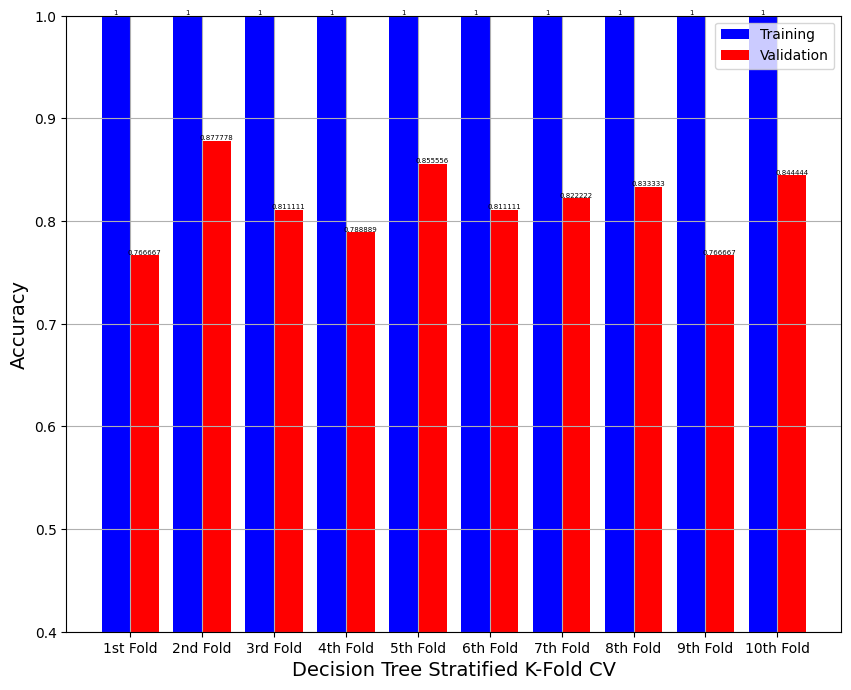

In [122]:
plot_accuracy_result(
    'Decision Tree Stratified K-Fold CV', 
    'Accuracy', 
    lst_accu_stratified_train,
    lst_accu_stratified_test,
)

In [128]:
compare_acc = [['K-Fold CV', viz_df['Score'].loc[viz_df.index[0]]],['Stratified K-Fold CV', mean(lst_accu_stratified_test)*100]]

In [129]:
compare_acc_viz = pd.DataFrame(compare_acc, columns=['CV','Accuracy'])

compare_acc_viz

,CV,Accuracy
0,K-Fold CV,80.890000
1,Stratified K-Fold CV,81.777778


<function matplotlib.pyplot.show(close=None, block=None)>

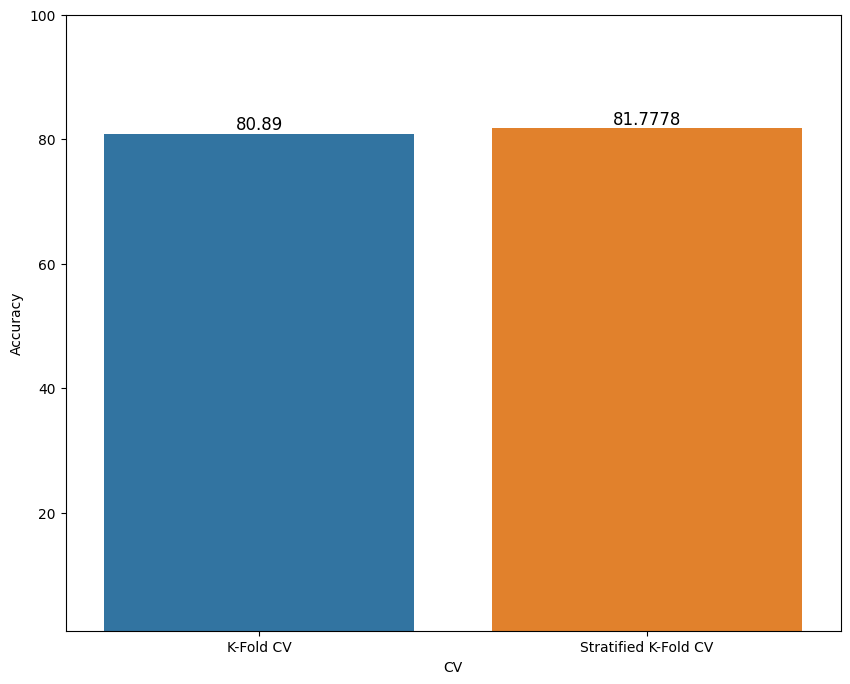

In [134]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='CV',y='Accuracy',data=compare_acc_viz, ax=ax)
ax.set_ylim(1, 100)
perf_levels.set(title='K-Fold CV vs Stratified K-Fold CV')

for i in ax.containers:
    ax.bar_label(i,fontsize=12)
    
    
plt.show